In [88]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn import preprocessing
pd.options.display.float_format = '{:.2f}'.format           
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
from sklearn import manifold

## Data Load

In [2]:
df_full = pd.read_csv('df_full.CSV', engine='python', encoding='utf-8', index_col=0)

In [71]:
df_full = df_full[['obj_constructionPhase','geo_bln','Generated_index','obj_purchasePrice']]

In [72]:
df_full.head()

,obj_constructionPhase,geo_bln,Generated_index,obj_purchasePrice
0,no_information,Bayern,1,540000.00
1,completed,Nordrhein_Westfalen,2,408000.00
2,no_information,Nordrhein_Westfalen,3,184000.00
3,completed,Nordrhein_Westfalen,4,729000.00
4,no_information,Saarland,5,119000.00


## Example - Table

In [73]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_constructionPhase','geo_bln'])['Generated_index'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_constructionPhase','geo_bln'], right_on=['obj_constructionPhase','geo_bln'])
grouped.rename( columns={'Generated_index':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_constructionPhase','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase,completed,no_information,projected,under_construction
geo_bln,,,,
Baden_Württemberg,5281,13456,4824,186
Bayern,4949,14543,5650,561
Berlin,965,3056,471,54
Brandenburg,1983,5632,2739,143
Bremen,297,1047,82,28
Hamburg,286,1763,310,41
Hessen,3589,10875,2856,216
Mecklenburg_Vorpommern,1048,3591,554,53
Niedersachsen,4918,17075,2762,208


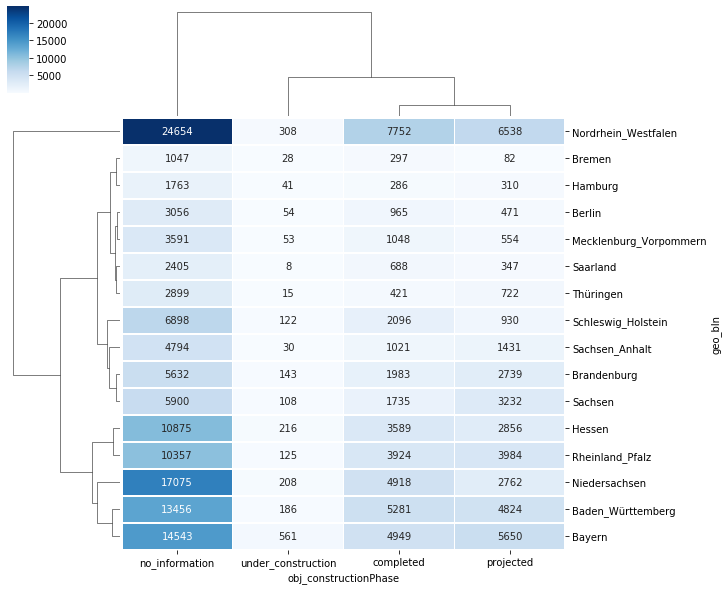

In [74]:
#First chart - what is a clustermap
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="average", annot=True)

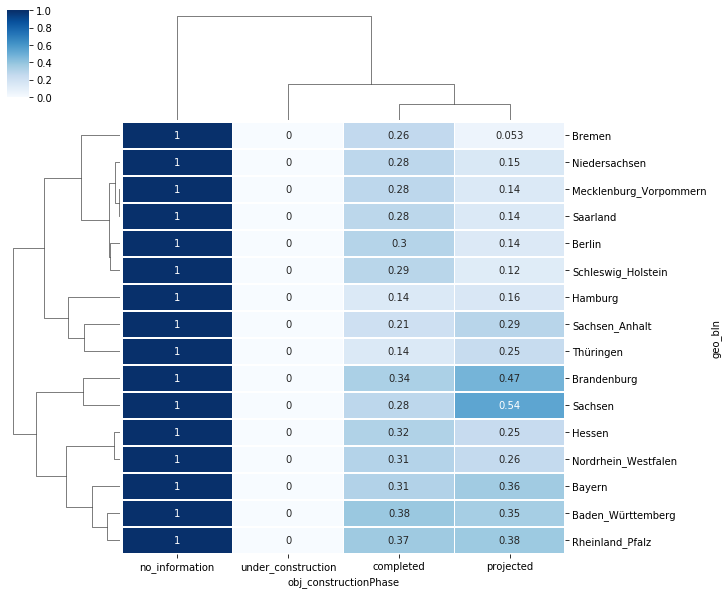

In [75]:
#Chart with standard scaler - Row
h=sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0,  method="average", annot=True)

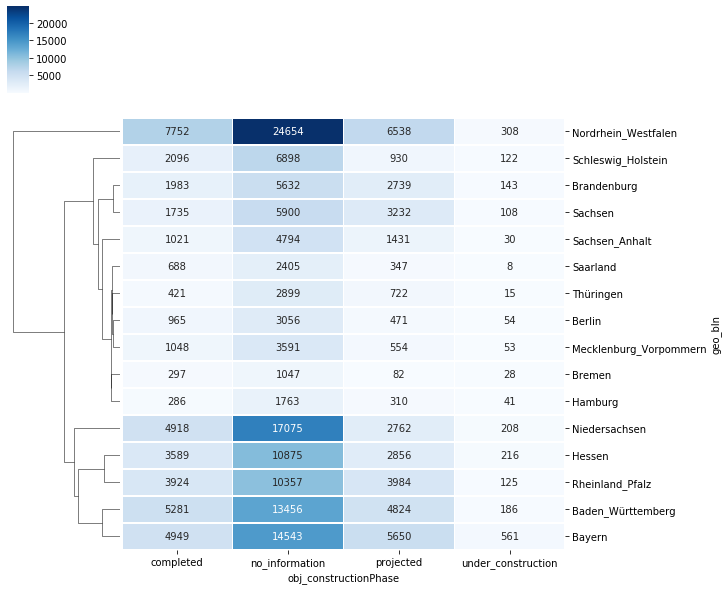

In [76]:
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="single", annot=True, col_cluster=False)

In [78]:
grouped = df_full.groupby(['geo_bln'])['obj_purchasePrice'].count()
grtouped = grouped.rename( columns={'obj_purchasePrice':'Amount_offers'}, inplace=True )
grouped = pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped.set_index('geo_bln')
grouped

,0
geo_bln,
Baden_Württemberg,23747
Bayern,25703
Berlin,4546
Brandenburg,10497
Bremen,1454
Hamburg,2400
Hessen,17536
Mecklenburg_Vorpommern,5246
Niedersachsen,24963


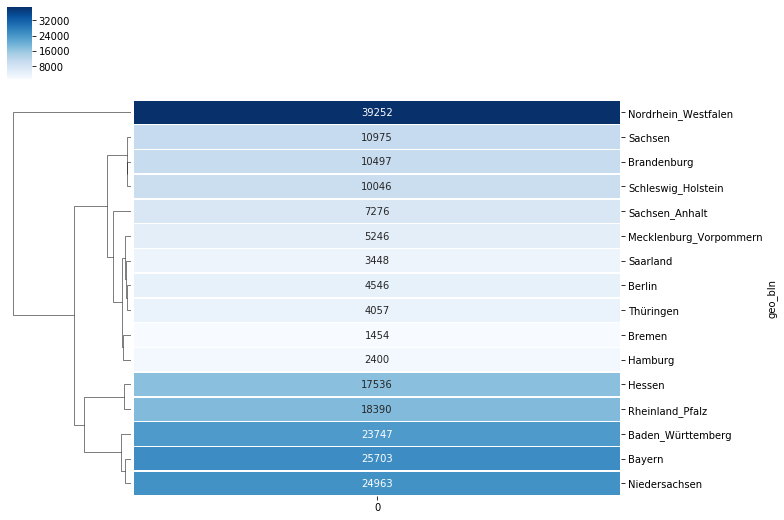

In [96]:
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="single", annot=True, col_cluster=False, figsize=(11,9))

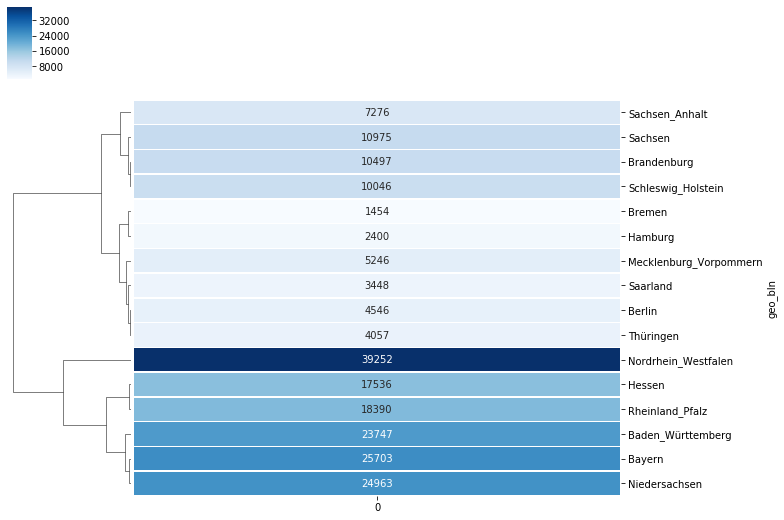

In [100]:
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="complete", annot=True, col_cluster=False, figsize=(11,9))

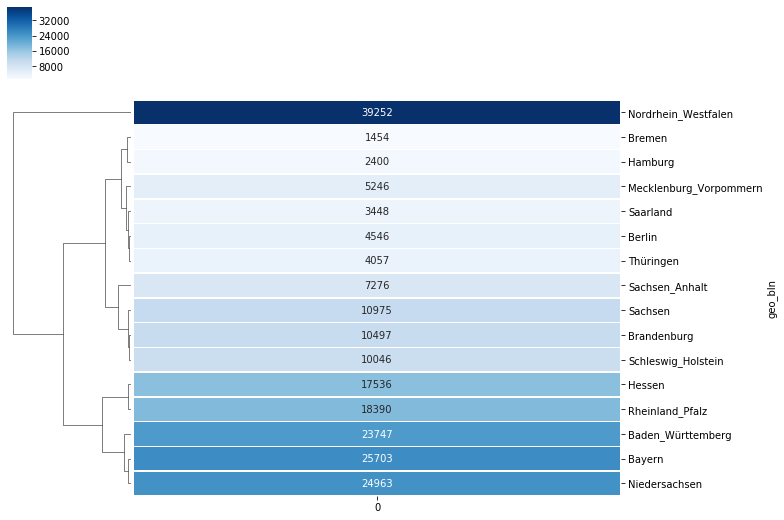

In [102]:
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="average", annot=True, col_cluster=False, figsize=(11,9))

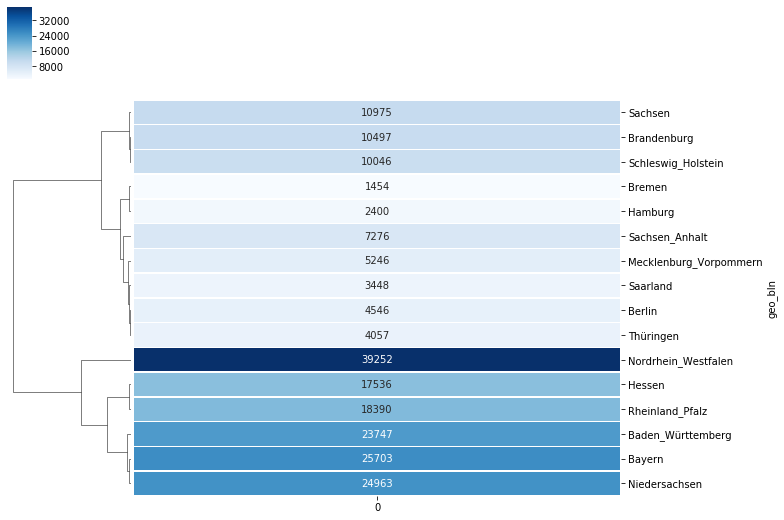

In [103]:
h=sns.clustermap(grouped, cmap="Blues", fmt="d", linewidth=.5, method="ward", annot=True, col_cluster=False, figsize=(11,9))

In [10]:
distance_matrix = pd.DataFrame(distance_matrix(grouped.values, grouped.values), index=grouped.index, columns=grouped.index)
distance_matrix

geo_bln,Baden_Württemberg,Bayern,Berlin,Brandenburg,Bremen,Hamburg,Hessen,Mecklenburg_Vorpommern,Niedersachsen,Nordrhein_Westfalen,Rheinland_Pfalz,Saarland,Sachsen,Sachsen_Anhalt,Schleswig_Holstein,Thüringen
geo_bln,,,,,,,,,,,,,,,,
Baden_Württemberg,0.00,1956.00,19201.00,13250.00,22293.00,21347.00,6211.00,18501.00,1216.00,15505.00,5357.00,20299.00,12772.00,16471.00,13701.00,19690.00
Bayern,1956.00,0.00,21157.00,15206.00,24249.00,23303.00,8167.00,20457.00,740.00,13549.00,7313.00,22255.00,14728.00,18427.00,15657.00,21646.00
Berlin,19201.00,21157.00,0.00,5951.00,3092.00,2146.00,12990.00,700.00,20417.00,34706.00,13844.00,1098.00,6429.00,2730.00,5500.00,489.00
Brandenburg,13250.00,15206.00,5951.00,0.00,9043.00,8097.00,7039.00,5251.00,14466.00,28755.00,7893.00,7049.00,478.00,3221.00,451.00,6440.00
Bremen,22293.00,24249.00,3092.00,9043.00,0.00,946.00,16082.00,3792.00,23509.00,37798.00,16936.00,1994.00,9521.00,5822.00,8592.00,2603.00
Hamburg,21347.00,23303.00,2146.00,8097.00,946.00,0.00,15136.00,2846.00,22563.00,36852.00,15990.00,1048.00,8575.00,4876.00,7646.00,1657.00
Hessen,6211.00,8167.00,12990.00,7039.00,16082.00,15136.00,0.00,12290.00,7427.00,21716.00,854.00,14088.00,6561.00,10260.00,7490.00,13479.00
Mecklenburg_Vorpommern,18501.00,20457.00,700.00,5251.00,3792.00,2846.00,12290.00,0.00,19717.00,34006.00,13144.00,1798.00,5729.00,2030.00,4800.00,1189.00
Niedersachsen,1216.00,740.00,20417.00,14466.00,23509.00,22563.00,7427.00,19717.00,0.00,14289.00,6573.00,21515.00,13988.00,17687.00,14917.00,20906.00


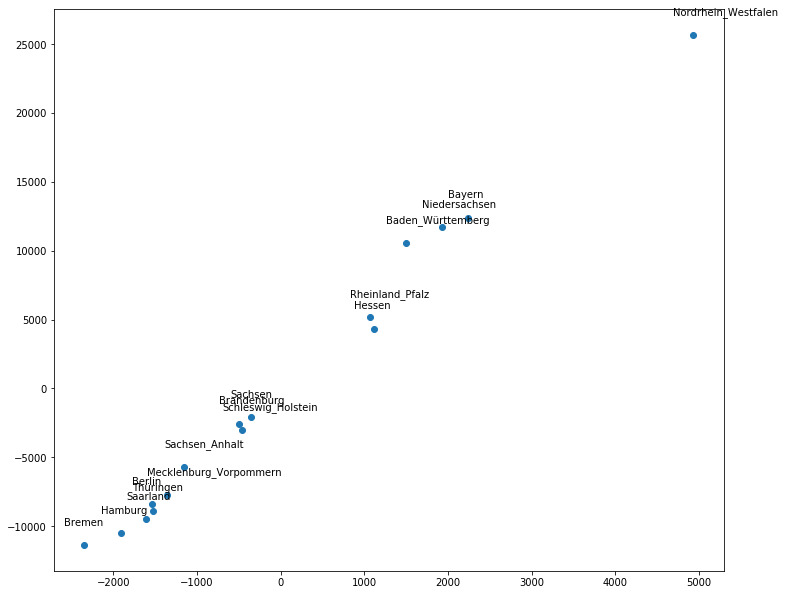

In [98]:
data = pd.read_csv("Test.csv", index_col='Geo_bln')

mds = manifold.MDS(n_components=2, dissimilarity="precomputed", n_init=50, max_iter=1000, random_state=1)
results = mds.fit(data.values)

Geo_bln = data.columns
coords = results.embedding_

fig = plt.figure(figsize=(12,10))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(Geo_bln, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), 
        xytext = (-20, 20),
        textcoords = 'offset points'
    )
plt.show()

## Clusters - matrix data

In [22]:
# Define labels for the dataset header
matriz_headers = ['completed','no_information','projected','under_construction']

# Create frame-based difference matrix
matriz_diferencias = [
    [],                         
    [11.35],                       
    [0.61, 11.96],                   
    [4.65, 16, 4.04],                   
    ]
matriz_headers, matriz_diferencias

(['completed', 'no_information', 'projected', 'under_construction'],
 [[], [11.35], [0.61, 11.96], [4.65, 16, 4.04]])

In [23]:
# Functions
# Returns the coordinates (column, row) containing the lowest value of the matrix
def posicion_con_valor_mas_bajo(matriz):
    # Cell value with minimum value
    valor_minimo = float('inf')
    posicion_x = -1
    posicion_y = -1
    
    # Traverse the entire matrix to find the smallest value
    for i in range(len(matriz)):
        for j in range(len(matriz[i])):
            if(matriz[i][j] < valor_minimo):
                valor_minimo = matriz[i][j]
                posicion_x = i
                posicion_y = j
                
    return posicion_x, posicion_y

# Debug
# x, y = posicion_con_valor_mas_bajo(matriz_diferencias)
# print( 'Posicion:', x, ',', y, '-> Valor',  matriz_diferencias[x][y])

In [24]:
# Combine two labels into one and erase the position with less value
# params: List of labels, positions
def juntar_headers(headers, a, b):
    if b < a:
        a, b = b, a
        
    # Join labels in the first position
    headers[a] = "(" + headers[a] + "," + headers[b] + ")"

    # Delete label from second position
    del headers[b]

# Debug
# juntar_headers(matriz_headers, 1, 2)
# matriz_headers

In [25]:
# Join two columns of the matrix and save the result (average) in the first column
# Params: matrix of differences, position of the columns
def juntar_matriz(matriz, a, b):
    if b < a:
        a, b = b, a

    # Recalculate row for smaller index
    fila = []
    for i in range(0, a):
        fila.append((matriz[a][i] + matriz[b][i])/2)
    matriz[a] = fila
    
    # Recalculate entire column
    for i in range(a+1, b):
        matriz[i][a] = (matriz[i][a] + matriz[b][i])/2
        
    # get the rest of the values in row i
    for i in range(b+1, len(matriz)):
        matriz[i][a] = (matriz[i][a] + matriz[i][b])/2
        # Delete the second column
        del matriz[i][b]

    # Delete the second row
    del matriz[b]

In [26]:
# UPGMA Core
def upgma(matriz, headers):
    # Stop when all labels are joined
    print('Matrix of Initial Differences: ', matriz)
    
    iteracion = 0
    while len(headers) > 1:        
        print('\nIteration: ', iteracion)
        print('#Clusters: ', len(matriz))
                
        # Locate the position in the matrix containing the lowest value
        x, y = posicion_con_valor_mas_bajo(matriz)
        print('Position with lower value:', x, ',', y, '-> Valor = ',  matriz[x][y])
        
        # Actualizar los headers
        juntar_headers(headers, x, y)        
        print('Labels updated:', headers)
        
        # Junta dos columnas de la matriz de diferencias en las coordenadas de la posicion
        juntar_matriz(matriz, x, y)
        print('Array values joined:', matriz)
        iteracion += 1

    # Final result stored in the first position
    return headers[0]
#Source: https://github.com/nextco/clustering-algorithms/blob/master/upgma.ipynb

In [27]:
upgma(matriz_diferencias, matriz_headers)

Matrix of Initial Differences:  [[], [11.35], [0.61, 11.96], [4.65, 16, 4.04]]

Iteration:  0
#Clusters:  4
Position with lower value: 2 , 0 -> Valor =  0.61
Labels updated: ['(completed,projected)', 'no_information', 'under_construction']
Array values joined: [[], [11.655000000000001], [4.345000000000001, 16]]

Iteration:  1
#Clusters:  3
Position with lower value: 2 , 0 -> Valor =  4.345000000000001
Labels updated: ['((completed,projected),under_construction)', 'no_information']
Array values joined: [[], [13.8275]]

Iteration:  2
#Clusters:  2
Position with lower value: 1 , 0 -> Valor =  13.8275
Labels updated: ['(((completed,projected),under_construction),no_information)']
Array values joined: [[]]


'(((completed,projected),under_construction),no_information)'